In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [98]:
FilePath = os.path.join(os.getcwd(), 'Windows_Data/dataset_19f.csv')
dataset = pd.read_csv(FilePath)
dataset = dataset.dropna(axis=0,how='any')
dataset.describe()

,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,mean_smv,std_ax,std_ay,std_az,std_gx,std_gy,std_gz,std_smv,std_mless,max_smv,min_smv,slope,duration,label
count,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000,34315.000000
mean,0.161652,6.547284,0.397156,-0.022075,0.000555,0.014459,10.505864,2.900735,4.502420,3.130080,1.327354,1.294819,0.819440,4.293579,4.220585,22.589334,2.817005,21.013964,-9.154247,0.054495
std,2.746916,5.807777,1.809250,0.100083,0.166833,0.091832,0.911743,1.203517,2.104065,1.010102,0.487065,0.570760,0.374033,1.827197,1.968406,2.866357,1.784753,4.131163,367.705840,0.226995
min,-10.208453,-10.271453,-10.005843,-0.632424,-1.094711,-0.470894,7.068501,0.280671,0.280595,0.258406,0.057227,0.059248,0.039491,0.485820,0.000000,16.500085,0.030987,8.746319,-993.000000,0.000000
25%,-1.012760,6.677938,-0.377537,-0.068064,-0.059041,-0.042099,10.113319,2.059933,2.960514,2.452467,0.989161,0.931015,0.552926,3.032348,2.887481,20.492144,1.095574,18.000196,-245.000000,0.000000
50%,0.124872,9.359556,0.269218,-0.018464,-0.002978,0.012475,10.444877,2.683181,3.644633,2.980345,1.265027,1.207482,0.746398,3.727303,3.754799,22.472153,2.995103,21.344936,-17.000000,0.000000
75%,1.503765,9.776552,1.007712,0.030756,0.051061,0.070394,10.805229,3.418875,6.445348,3.635464,1.611730,1.513945,1.006192,5.511998,5.571139,24.506658,4.146546,24.012152,214.000000,0.000000
max,10.119549,10.565246,9.462464,0.619892,0.949169,0.468317,15.180757,9.127654,10.679623,8.141915,3.607131,4.818761,2.835267,10.917130,11.371032,32.885551,9.237574,34.798956,989.000000,1.000000


In [99]:
# 10 feature dataset
# X = dataset[['mean_ax','mean_ay','mean_az', 'mean_smv', 
#               'std_smv', 'std_mless', 'max_smv', 'min_smv', 'slope', 'duration']].values
# y = dataset[['label']].values
# 13 features dataset
# X = dataset[['mean_ax','mean_ay','mean_az', 'mean_smv', 
#              'std_ax', 'std_ay', 'std_az', 'std_smv', 'std_mless', 
#              'max_smv', 'min_smv', 'slope', 'duration']].values
# y = dataset[['label']].values
# 19 feature dataset
X = dataset[['mean_ax','mean_ay','mean_az','mean_gx','mean_gy','mean_gz','mean_smv', 
             'std_ax', 'std_ay', 'std_az','std_gx', 'std_gy','std_gz','std_smv','std_mless', 
             'max_smv', 'min_smv', 'slope', 'duration']].values
y = dataset[['label']].values
print(dataset.loc[dataset['label'] == 1].describe())
print('-'*100)
print(dataset.loc[dataset['label'] == 0].describe())

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y ,random_state=42)


print('-'*100)
print(len(np.argwhere(y_train == 0)))
print(len(np.argwhere(y_train == 1)))
over = SMOTE(sampling_strategy = 0.15)
under = RandomUnderSampler(sampling_strategy = 0.6)

X_train_resample, y_train_resample = over.fit_resample(X_train, y_train)
print('-'*100)
print(len(np.argwhere(y_train_resample == 0)))
print(len(np.argwhere(y_train_resample == 1)))
X_train_resample, y_train_resample = under.fit_resample(X_train_resample, y_train_resample)
print('-'*100)
print(len(np.argwhere(y_train_resample == 0)))
print(len(np.argwhere(y_train_resample == 1)))

           mean_ax      mean_ay      mean_az      mean_gx      mean_gy  \
count  1870.000000  1870.000000  1870.000000  1870.000000  1870.000000   
mean      0.225473     1.997096     2.099988    -0.095524     0.008988   
std       4.749534     2.880429     4.985206     0.214385     0.110224   
min      -9.416236    -7.579210    -9.868187    -0.482011    -0.368216   
25%      -3.944016     0.388411    -2.899911    -0.272365    -0.048797   
50%       0.027226     2.583475     3.998813    -0.183321     0.009851   
75%       4.532634     4.174693     5.834172     0.110921     0.062112   
max       9.460887     7.711178     9.175232     0.457516     0.446086   

           mean_gz     mean_smv       std_ax       std_ay       std_az  \
count  1870.000000  1870.000000  1870.000000  1870.000000  1870.000000   
mean      0.006039    10.033300     3.116171     3.782372     3.696545   
std       0.136209     0.214833     1.048113     1.216842     1.473344   
min      -0.316814     9.339711     0

In [44]:
resample_fall = pd.DataFrame(np.squeeze(X_train_resample[np.squeeze(np.argwhere(y_train_resample == 1))]), 
                                        columns=['mean_ax','mean_ay','mean_az','mean_smv', 'std_smv', 'std_mless', 'max_smv', 'min_smv', 'slope', 'duration'])
resample_normal = pd.DataFrame(np.squeeze(X_train_resample[np.squeeze(np.argwhere(y_train_resample == 0))]), 
                                        columns=['mean_ax','mean_ay','mean_az','mean_smv', 'std_smv', 'std_mless', 'max_smv', 'min_smv', 'slope', 'duration'])
print(resample_fall.describe())
print('-'*100)
print(resample_normal.describe())

           mean_ax      mean_ay      mean_az     mean_smv      std_smv  \
count  1402.000000  1402.000000  1402.000000  1402.000000  1402.000000   
mean      0.042673    -0.787955     0.951564    -0.514455    -1.048507   
std       1.746974     0.493250     2.751252     0.235179     0.249036   
min      -3.486829    -2.326660    -5.673894    -1.239097    -1.794788   
25%      -1.506344    -1.062967    -1.693263    -0.679016    -1.228387   
50%       0.010691    -0.693370     2.000686    -0.528893    -1.042154   
75%       1.621093    -0.418746     3.006464    -0.359311    -0.865308   
max       3.360617     0.200406     4.851847     0.354307    -0.239126   

         std_mless      max_smv      min_smv        slope     duration  
count  1402.000000  1402.000000  1402.000000  1402.000000  1402.000000  
mean     -1.204366     1.081268     0.126638     0.063564     0.892612  
std       0.394510     0.985977     0.831828     0.197368     0.846476  
min      -2.027616    -1.989712    -1.409

Accuracy on resampled training set: 0.9970204459056817
Accuracy on original training set: 0.9934721790488033
Accuracy on testing set: 0.9931227415782725
--------------------------------------------------
Precision score on testing set: 0.8895238095238095
Recall score on testing set: 0.9978632478632479
F1 score on testing set: 0.9405840886203425
--------------------------------------------------


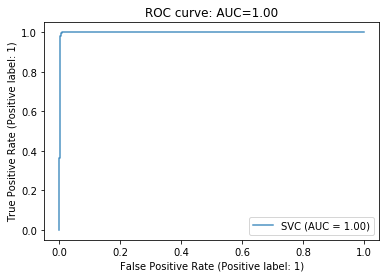

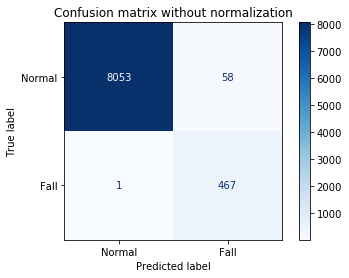

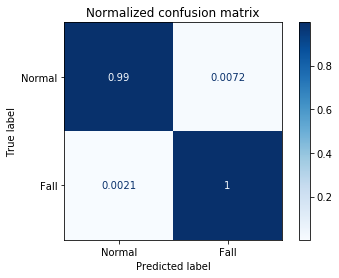

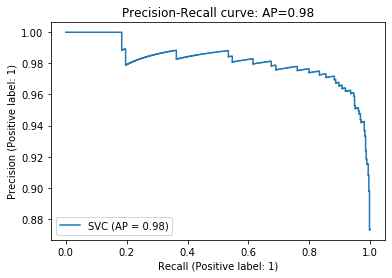

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# clf = RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200) 
# clf.fit(X_train_resample, y_train_resample)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve


clf = SVC(gamma=0.1, C=1)
clf.fit(X_train_resample, y_train_resample)

print('Accuracy on resampled training set: {}'.format(clf.score(X_train_resample, y_train_resample)))
print('Accuracy on original training set: {}'.format(clf.score(X_train, y_train)))
print('Accuracy on testing set: {}'.format(clf.score(X_test, y_test)))
print('-'*50)
y_pred = clf.predict(X_test)
print('Precision score on testing set: {}'.format(precision_score(y_test, y_pred)))
print('Recall score on testing set: {}'.format(recall_score(y_test, y_pred)))
print('F1 score on testing set: {}'.format(f1_score(y_test, y_pred)))
print('-'*50)

# Plot ROC curve 
# y_pred_score = clf.predict_proba(X_test)[:,1]
y_pred_score = clf.decision_function(X_test)
AUC = roc_auc_score(y_test, y_pred_score)
rfc_disp = plot_roc_curve(clf, X_test, y_test, alpha=0.8)
rfc_disp.ax_.set_title('ROC curve: '
                   'AUC={0:0.2f}'.format(AUC))
plt.show()

# Plot non/normalized confusion matrix
titles_options = [("Confusion matrix without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels= ['Normal', 'Fall'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.show()

# Plot PR curve
AP = average_precision_score(y_test, y_pred_score)
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(AP))
plt.show()

In [101]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [102]:
# Feed all data for final classifier
FilePath = os.path.join(os.getcwd(), 'Windows_Data/dataset_19f.csv')
dataset = pd.read_csv(FilePath)

# 10 feature dataset
# X = dataset[['mean_ax','mean_ay','mean_az','mean_smv', 'std_smv', 
#              'std_mless', 'max_smv', 'min_smv', 'slope', 'duration']].values
# y = dataset[['label']].values

# 13 feature dataset
# X = dataset[['mean_ax','mean_ay','mean_az','mean_smv', 'std_ax','std_ay', 'std_az', 'std_smv', 
#              'std_mless', 'max_smv', 'min_smv', 'slope', 'duration']].values
# y = dataset[['label']].values

# 19 feature dataset
X = dataset[['mean_ax','mean_ay','mean_az','mean_gx','mean_gy','mean_gz','mean_smv',
             'std_ax','std_ay','std_az','std_gx','std_gy','std_gz','std_smv', 
             'std_mless', 'max_smv', 'min_smv', 'slope', 'duration']].values
y = dataset[['label']].values

scaler = StandardScaler()
scaler.fit(X)
X_nm = scaler.transform(X)
over = SMOTE(sampling_strategy=0.15)
under = RandomUnderSampler(sampling_strategy=0.6)
X_nm, y = over.fit_resample(X_nm, y)
X_nm, y = under.fit_resample(X_nm, y)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, stratify=y ,random_state=42)
# clf = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=200) 
# clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

In [90]:
svm = SVC(gamma=0.01, C=0.1)
svm.fit(X_nm, y)

SVC(C=1, gamma=0.1)

In [91]:
# Model export
import pickle
s1=pickle.dumps(svm)
f=open('model/svm_13f','wb')
f.write(s1)
f.close()

s2=pickle.dumps(scaler)
f=open('model/scaler_13f','wb')
f.write(s2)
f.close()

In [94]:
# test exported model
f2=open('model/svm_13f','rb')
s2=f2.read()
svm_load=pickle.loads(s2)
f2.close()

f2=open('model/scaler_13f','rb')
s2=f2.read()
scaler_load=pickle.loads(s2)
f2.close()